# 21BAI1133 - Mukundh J

# Decision Tree - ML Lab assignment 7

#    1. PlayTennis
Consider PlayTennis Dataset (see attached csv file) that is used for predicting whether a tennis game is played in the given weather conditions or not. Here the weather conditions are described by features outlook, temperature, humidity, play and wind. The target is play with two class labels Yes and No. 

    i. Compute information gain for all the attributes and display them.
    ii. Find which attribute will become the root node of the decision tree.
    iii. Scikit DecisionTreeClassifier
        ◦ Train using DecisionTreeClassifier using tennis dataset; 
        ◦ Classify the test sample  <Rain, Cool, High,Weak>. 
        ◦ Draw the decision tree for a max depth 2
graph = Source( tree.export_graphviz(id3_model, out_file = None))
SVG(graph.pipe(format='svg'))

      Check whether root node that you identified is same as the one returned by Scikit DecisionTreeClassifier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('play.csv')

In [3]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# i

In [4]:
p_play = data['play'].value_counts(normalize=True)
entropy_play = - (p_play * np.log2(p_play)).sum()
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])


In [5]:
def calc_entropy(attr):
    p_attr = data[attr].value_counts(normalize=True)
    entropy_attr = 0
    for val in p_attr.index:
        p_val = data[data[attr]==val]['play'].value_counts(normalize=True)
        entropy_val = - (p_val * np.log2(p_val)).sum()
        weight = p_attr[val]
        entropy_attr += weight * entropy_val
    return entropy_attr


In [6]:
ig = {}
for attr in ['outlook', 'temp', 'humidity', 'wind']:
    ig[attr] = entropy_play - calc_entropy(attr)

In [7]:
print("Information gain for each attribute:")
for i in ig:
    print(i,'=>',ig[i])

Information gain for each attribute:
outlook => 0.24674981977443933
temp => 0.02922256565895487
humidity => 0.15183550136234159
wind => 0.04812703040826949


# ii

In [8]:
root = max(ig, key=ig.get)
print("The root node is:",root) 

The root node is: outlook


# iii

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [11]:
X=data[['outlook','temp','humidity','wind']]
y=data['play']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
X_train

,outlook,temp,humidity,wind
4,1,0,1,1
1,2,1,0,0
12,0,1,1,1
0,2,1,0,1
13,1,2,0,0
9,1,2,1,1
8,2,0,1,1
11,0,2,0,0
5,1,0,1,0


In [14]:
y_train

4     1
1     0
12    1
0     0
13    0
9     1
8     1
11    1
5     0
Name: play, dtype: int64

In [15]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [16]:
clf = clf.fit(X_train,y_train)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
y_pred

array([0, 0, 1, 0, 0])

In [19]:
X_test = pd.DataFrame({'outlook_Rain': [1], 'temperature_Cool': [1], 'humidity_High': [1], 'wind_Weak': [1]})
y_pred = clf.predict(X_test)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- humidity_High
- outlook_Rain
- temperature_Cool
- wind_Weak
Feature names seen at fit time, yet now missing:
- humidity
- outlook
- temp
- wind

  warnings.warn(message, FutureWarning)


In [20]:
y_pred

array([1])

Therefore result ==> Yes

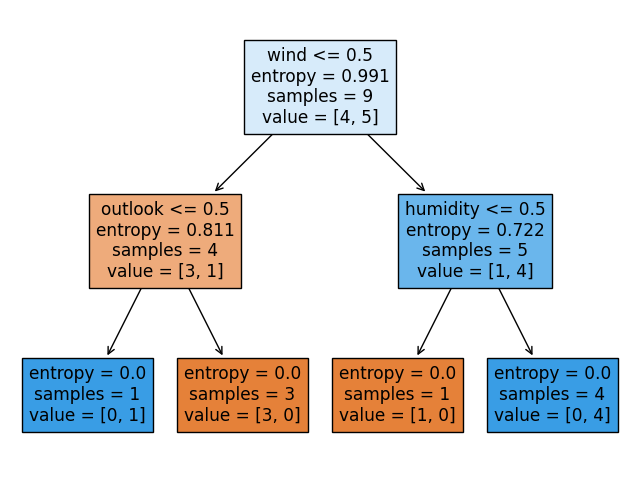

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()


As we can see, there is a change in the root node, it is wind instead of outlook

   # 2.      Predict heart disease 
    a. Apply decision tree classifier on heart disease dataset and report the accuracy.
    b. Try to change the following hyperparameters of the decision tree model and report the change in the accuracy
            i. Splitting Criterion from entropy to gini
            ii. max_depth 
            iii. min_samples_leaf

In [22]:
df = pd.read_csv('heart.csv')
df = df.dropna(axis=0)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7595628415300546

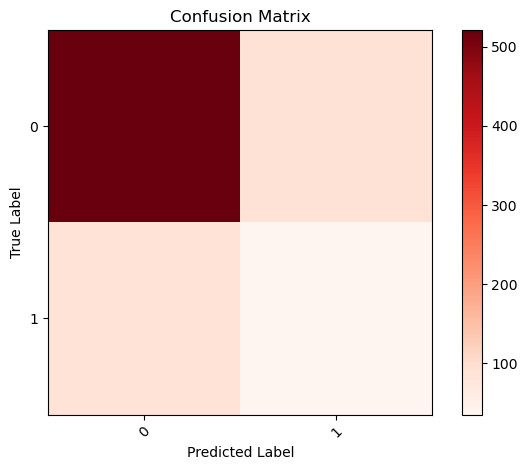

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.2845528455284553

In [30]:
clfb1 = DecisionTreeClassifier(criterion="gini")
clfb1.fit(X_train, y_train)
y_predb1 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb1)
accuracy = accuracy_score(y_test, y_predb1)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

Let's try changing the hyper parameters

In [31]:
clfb2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
clfb2.fit(X_train, y_train)
y_predb2 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb2)
accuracy = accuracy_score(y_test, y_predb2)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

In [32]:
clfb2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clfb2.fit(X_train, y_train)
y_predb2 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb2)
accuracy = accuracy_score(y_test, y_predb2)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

In [33]:
clfb3 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5)
clfb3.fit(X_train, y_train)
y_predb3 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb3)
accuracy = accuracy_score(y_test, y_predb3)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

In [34]:
clfb3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5)
clfb3.fit(X_train, y_train)
y_predb3 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb3)
accuracy = accuracy_score(y_test, y_predb3)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

In [35]:
clfb3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=7)
clfb3.fit(X_train, y_train)
y_predb3 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb3)
accuracy = accuracy_score(y_test, y_predb3)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

In [36]:
clfb3 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=7)
clfb3.fit(X_train, y_train)
y_predb3 = clf.predict(X_test)
f1 = f1_score(y_test, y_predb3)
accuracy = accuracy_score(y_test, y_predb3)
accuracy, f1

(0.7595628415300546, 0.2845528455284553)

It can be observed that there aren't any changes with change in hyperparameters